<a href="https://colab.research.google.com/github/Julianr98/AirBnB_clone_v4/blob/master/Copia_de_UTS_CORTE2_GRUPO_E131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
integrantes = [
    "Jesús Alejandro Laguado Acevedo",
    "Victor Julián Rodríguez Caicedo",
    "Ferney Bernardo Barajas Jaimes",
    "Ingrid Tatiana Pinzón",
    "Meryi Aleandra Anaya Mora"
]

print("Integrantes del grupo:")
for integrante in integrantes:
    print(f"* {integrante}")


Integrantes del grupo:
* Jesús Alejandro Laguado Acevedo
* Victor Julián Rodríguez Caicedo
* Ferney Bernardo Barajas Jaimes
* Ingrid Tatiana Pinzón
* Meryi Aleandra Anaya Mora


Funciones usadas:

In [2]:
def interpolacion_lagrange_sym(x, y, xi):
    """
    Calcula el valor interpolado usando el método de interpolación de Lagrange.

    Args:
    x: Lista de valores x.
    y: Lista de valores y correspondientes a los valores x.
    xi: El valor x en el que se desea interpolar.

    Returns: Un vector con los valores interpolados en xi.
    """
    n = len(x)
    interpolado = 0
    for i in range(n):
        producto = y[i]
        for j in range(n):
            if i != j:
               producto *= (xi - x[j]) / (x[i] - x[j])
        interpolado += producto
    return interpolado

In [ ]:
def coeficientes_diferencias_divididas(x, y):
    """
    Calcula los coeficientes de las diferencias divididas.

    Args:
    x: Lista de valores x.
    y: Lista de valores y correspondientes a los valores x.

    Returns:
    Una lista con los coeficientes de las diferencias divididas.
    """
    n = len(x)
    coeficientes = []
    for i in range(n):
        coeficientes.append(y[i])

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coeficientes[i] = (coeficientes[i] - coeficientes[i-1]) / (x[i] - x[i-j])

    return coeficientes

In [ ]:
def interpolacion_newton_sym(x, y, xi):
    """
    Calcula el valor interpolado usando el método de interpolación de Newton.

    Args:
    x: Lista de valores x.
    y: Lista de valores y correspondientes a los valores x.
    xi: El valor x en el que se desea interpolar.

    Returns:
    interpolado: Vector con los valores interpolados en xi.
    """
    coeficientes = coeficientes_diferencias_divididas(x, y)
    n = len(x)

    interpolado = coeficientes[0]
    for i in range(1, n):
        term = coeficientes[i]
        for j in range(i):
            term *= (xi - x[j])
        interpolado += term
    return interpolado

In [ ]:
def trapecio(fun,x,n,x0,x1):
    import numpy as np
    sol=0
    integ=np.zeros(n)
    h=np.zeros(n)
    vals=np.linspace(x0,x1,n+1)
    for i in range(n):
      h[i]=vals[i+1]-vals[i]
      integ[i]=(h[i])/2*(fun.subs(x,vals[i+1])+fun.subs(x,vals[i]))
      sol=sol+integ[i]
    return sol

In [ ]:
def simpson(fun, x, n, x0, x1):
    import numpy as np

    sol = 0
    integ = np.zeros(n)
    h = np.zeros(n)
    vals = np.linspace(x0, x1, n + 1)

    for i in range(n):
        h[i] = vals[i + 1] - vals[i]
        # Aplicar la fórmula de Simpson para cada segmento
        integ[i] = (h[i] / 6) * (fun.subs(x, vals[i]) + 4 * fun.subs(x, (vals[i] + vals[i + 1]) / 2) + fun.subs(x, vals[i + 1]))
        # Sumar la integral de cada segmento
        sol += integ[i]

    return sol

In [ ]:
def simpson13(fun,x,n,x0,x1):
    import numpy as np
    sol = 0
    integ = np.zeros(n)
    h = np.zeros(n)
    vals = np.linspace(x0, x1, n + 1)

    for i in range(n):
        h[i] = vals[i + 1] - vals[i]
        # Utilizamos la regla de Simpson para calcular la integral en cada subintervalo
        integ[i] = (h[i] / 6) * (fun.subs(x, vals[i]) + 4 * fun.subs(x, (vals[i] + vals[i + 1]) / 2) + fun.subs(x, vals[i + 1]))
        sol += integ[i]

    return sol

In [ ]:
def simpson38(fun,x,x0,x3):

    return (3 * h / 8) * (fun.subs(x, x0) + 3 * fun.subs(x, x0 + h) + 3 * fun.subs(x, x0 + 2 * h) + fun.subs(x, x3))



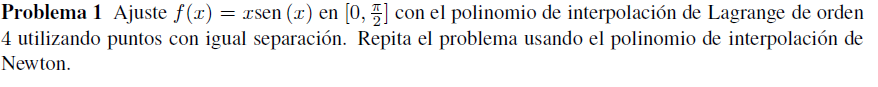

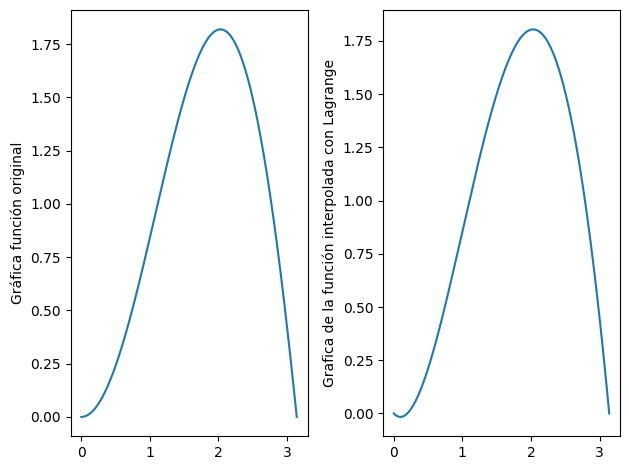

In [ ]:
import matplotlib.pyplot as plt  # Esta libreria es para dibujar
import numpy as np               # Libreria para funciones numericas
import sympy as sp
from sympy import lambdify

#Para obtener los valores de x y y
x=sp.symbols('x')
t=np.linspace(0,np.pi,5)     #Obtener 5 valores equiespaciados
f=t*np.sin(t)                #Valor de la función en los puntos
fnct=sp.simplify(interpolacion_lagrange_sym(t,f,x))

fnct=lambdify(x,fnct)


plt.subplot(1,2,1)
t=np.linspace(0,np.pi,500)
f=t*np.sin(t)
plt.plot(t,f) #Grafica de la función original
plt.ylabel('Gráfica función original')

fnct_v=fnct(t)
plt.subplot(1,2,2)
plt.plot(t,fnct_v)
plt.ylabel('Grafica de la función interpolada con Lagrange')
plt.tight_layout()

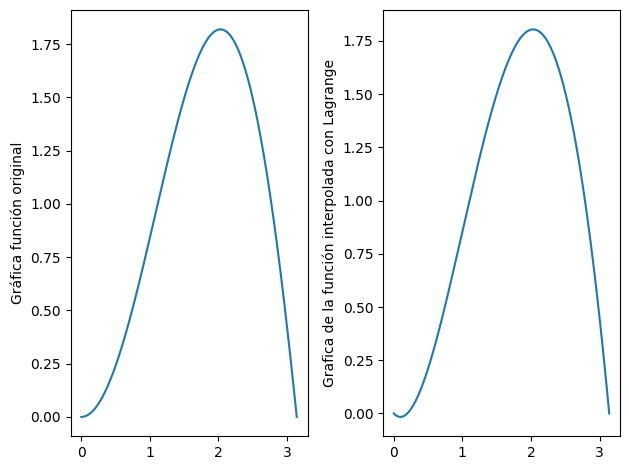

In [ ]:
#Ahora con newton

#Para obtener los valores de x y y
x=sp.symbols('x')
t=np.linspace(0,np.pi,5)     #Obtener 5 valores equiespaciados
f=t*np.sin(t)                #Valor de la función en los puntos
fnct=sp.simplify(interpolacion_newton_sym(t,f,x))

fnct=lambdify(x,fnct)


plt.subplot(1,2,1)
t=np.linspace(0,np.pi,500)
f=t*np.sin(t)
plt.plot(t,f) #Grafica de la función original
plt.ylabel('Gráfica función original')

fnct_v=fnct(t)
plt.subplot(1,2,2)
plt.plot(t,fnct_v)
plt.ylabel('Grafica de la función interpolada con Lagrange')
plt.tight_layout()

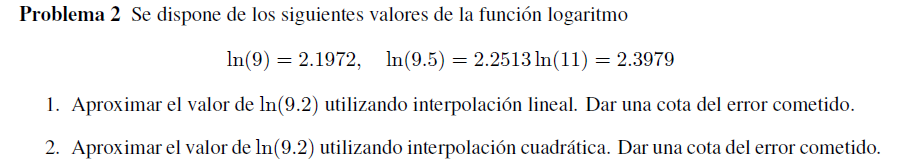

In [ ]:
# Puntos de datos conocidos
x_conocidos = [9, 9.5, 11]
y_conocidos = [2.1972, 2.2513, 2.3979]

coeficientes = np.polyfit(x_conocidos, y_conocidos, 2) #Para la interpolacion cuadratica


# Punto en el que se quiere interpolar
x_interpolar = 9.2                        #Valor a calcular

# Realizar interpolación lineal
ylineal = np.interp(x_interpolar, x_conocidos, y_conocidos)
yquad=np.polyval(coeficientes, x_interpolar);
# Imprimir resultados
print(f"Ln(9.2)={ylineal}")

# Valor calculado
interpl =ylineal
interpq=yquad
# Valor real
predicho = 2.219203484   ##Valor de Ln(9.2)

# Calcular el error cuadrático
error_cuadraticol = (interpl - predicho)**2

error_cuadratico2=(interpq-predicho)**2
print("El valor de Ln(9.2) con la interpolacion lineal es",interpl)
print("El valor de Ln(9.2) con la interpolacion cuadratica es",interpl)

print("El error cuadratico para la interpolacion lineal es", error_cuadraticol)
print("El error cuadratico para la interpolacion cuadratica es %f", error_cuadratico2)



Ln(9.2)=2.21884
El valor de Ln(9.2) con la interpolacion lineal es 2.21884
El valor de Ln(9.2) con la interpolacion cuadratica es 2.21884
El error cuadratico para la interpolacion lineal es 1.321206182558164e-07
El error cuadratico para la interpolacion cuadratica es %f 2.4486662558505323e-09


#Problema 3

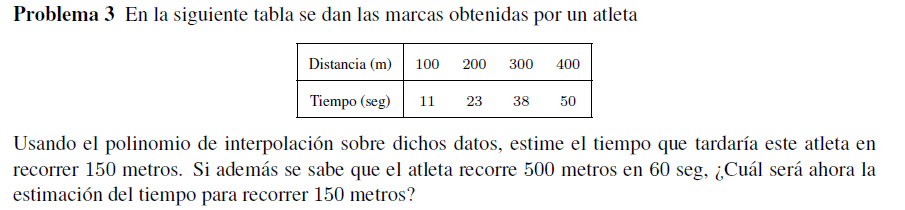


In [ ]:
from scipy.interpolate import interp1d
# Puntos de datos conocidos
t=sp.symbols('t')
x_conocidos = [11, 23, 38,50,60]
y_conocidos = [100, 200,300,400,500]

sol=sp.simplify(interpolacion_lagrange_sym(x_conocidos, y_conocidos, t))
print('La función que resulta de la interpolación es',sol)

coefficients = [-7165/125999874, 212165/20999979, -499045/857142, 1276531195/62999937, -124191400/1909089-150]
print('\n')

tsol=roots = np.roots(coefficients)   #Obtencion de raices del polinomio de lagrange

print('Las raices del polinomio de la interpolacion son',sp.simplify(tsol))

#Debido a que hay 2 raices complejas estas se descartan, y la real de t=111,94s no puede ser ya que recorre 200mts en 23, por lo tanto:
print('\n')

print('El atleta tarda %f segundos en recorrer 150mts' % tsol[3].real)


La función que resulta de la interpolación es -7165*t**4/125999874 + 212165*t**3/20999979 - 499045*t**2/857142 + 1276531195*t/62999937 - 124191400/1909089


Las raices del polinomio de la interpolacion son [111.944783596899, 24.7279546911373 + 38.2789297065869*I, 24.7279546911373 - 38.2789297065869*I, 16.2671367486704]


El atleta tarda 16.267137 segundos en recorrer 150mts


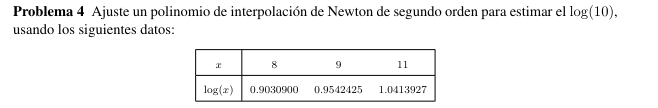

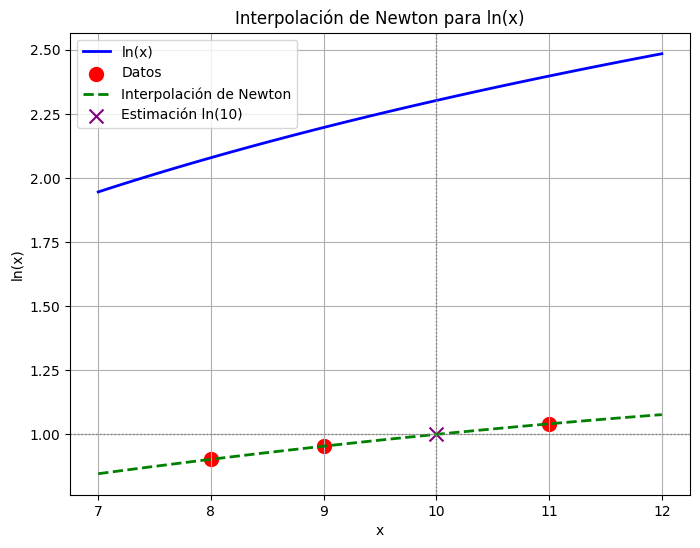

Estimación de ln(10) usando interpolación de Newton de segundo orden: 1.000343


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
x = np.array([8, 9, 11])
log_x = np.array([0.9030900, 0.9542425, 1.0413927])

# Orden del polinomio de interpolación de Newton
order = len(x) - 1  # Segundo orden para tres puntos (grado 2)

# Diferencias divididas de Newton
def divided_differences(x, y):
    n = len(x)
    F = np.zeros((n, n))
    F[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            F[i,j] = (F[i+1,j-1] - F[i,j-1]) / (x[i+j] - x[i])
    return F[0]  # Coeficientes de interpolación

# Coeficientes del polinomio de interpolación de Newton
coeffs = divided_differences(x, log_x)

# Función para evaluar el polinomio de interpolación de Newton
def newton_interpolation(x, xi, coeffs):
    n = len(coeffs)
    result = coeffs[0]
    for i in range(1, n):
        term = coeffs[i]
        for j in range(i):
            term *= (xi - x[j])
        result += term
    return result

# Estimación de log(10) utilizando el polinomio de interpolación de Newton
log_10_estimated = newton_interpolation(x, 10, coeffs)

# Puntos para la gráfica
x_plot = np.linspace(7, 12, 100)  # Rango extendido para la gráfica
y_plot = newton_interpolation(x, x_plot, coeffs)

# Configuración de la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x_plot, np.log(x_plot), label='ln(x)', color='blue', linestyle='-', linewidth=2)
plt.scatter(x, log_x, label='Datos', color='red', s=100, marker='o')
plt.plot(x_plot, y_plot, label='Interpolación de Newton', color='green', linestyle='--', linewidth=2)
plt.axvline(x=10, color='gray', linestyle=':', linewidth=1)
plt.axhline(y=log_10_estimated, color='gray', linestyle=':', linewidth=1)
plt.scatter(10, log_10_estimated, label='Estimación ln(10)', color='purple', s=100, marker='x')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('Interpolación de Newton para ln(x)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Resultado de la estimación de ln(10)
print(f"Estimación de ln(10) usando interpolación de Newton de segundo orden: {log_10_estimated:.6f}")



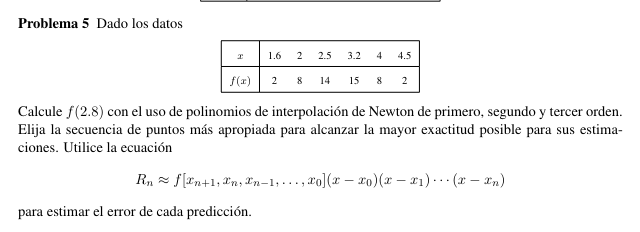

#Problema 16
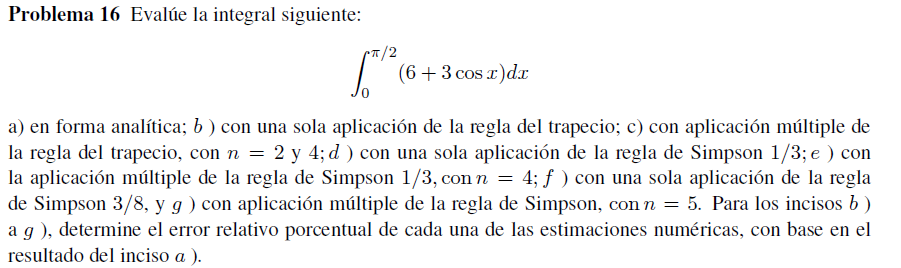

In [ ]:

import sympy as sp
import numpy as np

x = sp.symbols('x')
fun = 6 + 3*sp.cos(x)
intfun = sp.integrate(fun, x)
intfun = intfun.subs(x, np.pi/2) - intfun.subs(x, 0)
print('El resultado de resolver la integral analíticamente es %f' % intfun)
sup=np.pi/2

b=trapecio(fun,x,1,0,sup)
c1=trapecio(fun,x,2,0,sup)
c2=trapecio(fun,x,4,0,sup)
d=simpson13(fun,x,1,0,sup)
e=simpson13(fun,x,4,0,sup)
h = (sup) / 3
x0=0
x3=sup
f=(3 * h / 8) * (fun.subs(x, x0) + 3 * fun.subs(x, x0 + h) + 3 * fun.subs(x, x0 + 2 * h) + fun.subs(x, x3))
g=simpson(fun,x,5,0,sup)

print("El resultado del inciso b es", b)
print("El resultado del inciso c1 es",c1)
print("El resultado del inciso c2 es",c2)
print("El resultado del inciso d es", d)
print("El resultado del inciso e es", e)
print("El resultado del inciso f es",f)
print("El resultado del inciso g es", g)

error_b = abs((b - intfun) / intfun) * 100
error_c1 = abs((c1 - intfun) / intfun) * 100
error_c2 = abs((c2- intfun) / intfun) * 100
error_d = abs((d - intfun) / intfun) * 100
error_e = abs((e - intfun) / intfun) * 100
error_f = abs((f - intfun) / intfun) * 100
error_g = abs((g - intfun) / intfun) * 100

# Imprime los errores relativos porcentuales
print("Error relativo porcentual para b:", error_b, "%")
print("Error relativo porcentual para c1:", error_c1, "%")
print("Error relativo porcentual para c2:", error_c2, "%")
print("Error relativo porcentual para e:", error_e, "%")
print("Error relativo porcentual para f:", error_f, "%")
print("Error relativo porcentual para g:", error_g, "%")





El resultado de resolver la integral analíticamente es 12.424778
El resultado del inciso b es 11.780972450961723
El resultado del inciso c1 es 12.268956307674937
El resultado del inciso c2 es 12.386125363687706
El resultado del inciso d es 12.43161759324601
El resultado del inciso e es 12.424802847341283
El resultado del inciso f es 12.4277927307122
El resultado del inciso g es 12.42478813743208
Error relativo porcentual para b: 5.18162587565299 %
Error relativo porcentual para c1: 1.25412022320593 %
Error relativo porcentual para c2: 0.311092859797716 %
Error relativo porcentual para e: 0.000200297920673278 %
Error relativo porcentual para f: 0.0242641756042312 %
Error relativo porcentual para g: 8.19061936738201e-5 %


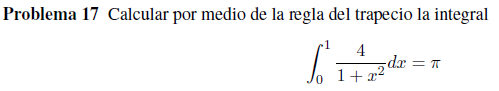

In [ ]:

import sympy as sp
import numpy as np

def trapecio(fun, var, n, a, b):
    h = (b - a) / n
    xi = np.linspace(a, b, n+1)
    fi = np.array([fun.subs(var, x_val) for x_val in xi])
    return h * (0.5*fi[0] + sum(fi[1:-1]) + 0.5*fi[-1])

def simpson13(fun, var, n, a, b):
    h = (b - a) / n
    xi = np.linspace(a, b, n+1)
    fi = np.array([fun.subs(var, x_val) for x_val in xi])
    return h * (fi[0] + 4*sum(fi[1:-1:2]) + 2*sum(fi[2:-2:2]) + fi[-1]) / 3

def simpson(fun, var, n, a, b):
    h = (b - a) / n
    xi = np.linspace(a, b, n+1)
    fi = np.array([fun.subs(var, x_val) for x_val in xi])
    return h * (fi[0] + 4*sum(fi[1:-1:3]) + 2*sum(fi[2:-2:3]) + 4*sum(fi[3:-3:3]) + fi[-1]) / 3

x = sp.symbols('x')
funci = 4 / (1 + x**2)
rta1 = trapecio(funci, x, 1, 0, 1)
rta2 = trapecio(funci, x, 2, 0, 1)
rta3 = trapecio(funci, x, 3, 0, 1)

print("El resultado con n=1 es:", rta1)
print("El resultado con n=2 es:", rta2)
print("El resultado con n=3 es:", rta3)



El resultado con n=1 es: 3.00000000000000
El resultado con n=2 es: 3.10000000000000
El resultado con n=3 es: 3.12307692307692


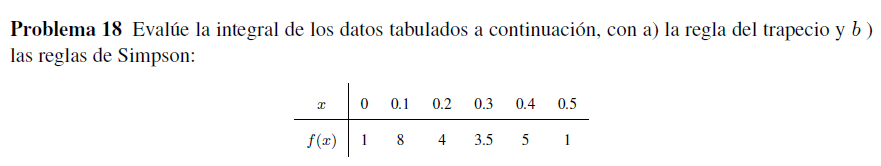

In [ ]:
vals=np.linspace(0,0.5,6)
y=[1,8,3,3.5,5,1]
h=0.5

#Trapecio
trap=h*(0.5)
print(trap)

#Simpson1/3
simp13=h/6 * (y[0] + 4*y[1] + y[-1])
print(simp13)

#Simpsongeneral
simps= h * (y[0] + 4 * y[1] + 2 * y[2] + 4 * y[3] + 2 * y[4] + y[5]) / 3
print(simps)

# Método de Simpson 3/8
integral_simpson_38 = 3 * h * (y[0] + 3 * y[1] + 3 * y[2] + 2 * y[3] + 3 * y[4] +  y[5] ) / 8
print(integral_simpson_38 )

0.25
2.833333333333333
10.666666666666666
10.6875


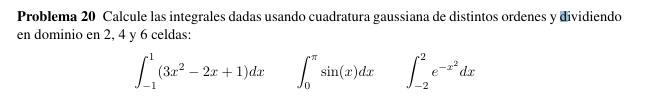


In [ ]:
import numpy as np
from scipy import integrate

# Definir las funciones que se van a integrar
def f1(x):
    return 3 * x**2 - 2 * x + 1

def f2(x):
    return np.sin(x)

def f3(x):
    return np.exp(-x**2)

# Definir los límites de integración y el número de divisiones (celdas)
integrals = [
    (f1, -1, 1),
    (f2, 0, np.pi),
    (f3, -2, 2)
]

n_partitions = [2, 4, 6]  # Número de divisiones (celdas) para cada integral

# Función para realizar la cuadratura gaussiana con un número dado de divisiones
def gauss_quad(f, a, b, n):
    x, w = np.polynomial.legendre.leggauss(n)  # Nodos y pesos de la cuadratura gaussiana
    integral_value = 0
    for i in range(n):
        integral_value += w[i] * f((b - a) / 2 * x[i] + (b + a) / 2)
    return (b - a) / 2 * integral_value

# Calcular la integral para cada función y cada número de divisiones
for f, a, b in integrals:
    print(f"Función a integrar: {f.__name__}")
    for n in n_partitions:
        integral_value = gauss_quad(f, a, b, n)
        print(f"Cuadratura Gaussiana con {n} divisiones: {integral_value:.6f}")


Función a integrar: f1
Cuadratura Gaussiana con 2 divisiones: 4.000000
Cuadratura Gaussiana con 4 divisiones: 4.000000
Cuadratura Gaussiana con 6 divisiones: 4.000000
Función a integrar: f2
Cuadratura Gaussiana con 2 divisiones: 1.935820
Cuadratura Gaussiana con 4 divisiones: 1.999984
Cuadratura Gaussiana con 6 divisiones: 2.000000
Función a integrar: f3
Cuadratura Gaussiana con 2 divisiones: 1.054389
Cuadratura Gaussiana con 4 divisiones: 1.714546
Cuadratura Gaussiana con 6 divisiones: 1.762655


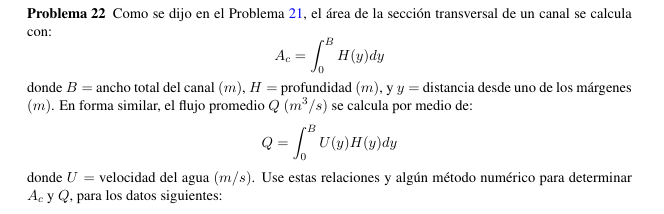



In [ ]:
import numpy as np
from scipy import integrate

# Definir las funciones H(y) y U(y) como ejemplo
def H(y, B):
    return 2 + np.cos(np.pi * y / B)

def U(y, B):
    return 1 + 0.5 * np.sin(2 * np.pi * y / B)

# Parámetros del canal
B = 10  # Ancho total del canal en metros

# Límites de integración
a = 0   # Límite inferior de integración (margen izquierdo)
b = B   # Límite superior de integración (margen derecho)

# Calcular el área de la sección transversal (Ac) utilizando la regla del trapecio
def calcular_Ac():
    return integrate.trapz(H(np.linspace(a, b, 1000), B), np.linspace(a, b, 1000))

# Calcular el flujo promedio (Q) utilizando la regla del trapecio
def calcular_Q():
    return integrate.trapz(U(np.linspace(a, b, 1000), B) * H(np.linspace(a, b, 1000), B), np.linspace(a, b, 1000))

# Resultados
Ac = calcular_Ac()
Q = calcular_Q()

# Imprimir resultados
print(f"Área de la sección transversal (Ac): {Ac:.4f} m^2")
print(f"Flujo promedio (Q): {Q:.4f} m^3/s")

Área de la sección transversal (Ac): 20.0000 m^2
Flujo promedio (Q): 22.1221 m^3/s


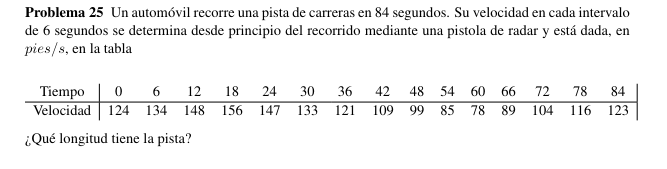


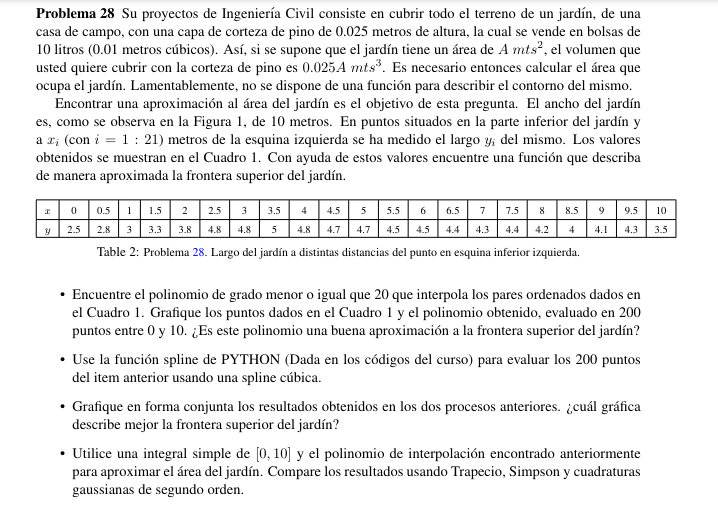


In [ ]:
import numpy as np

# Datos proporcionados
tiempo = np.array([0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84])  # Tiempo en segundos
velocidad = np.array([124, 134, 148, 156, 147, 133, 121, 109, 99, 85, 78, 89, 104, 116, 123])  # Velocidad en pies por segundo

# Intervalo de tiempo (segundos)
h = tiempo[1] - tiempo[0]

# Calcular la longitud de la pista utilizando la regla del trapecio
longitud_pista = h * (np.sum(velocidad) - (velocidad[0] + velocidad[-1]) / 2)

# Mostrar resultado
print(f"La longitud de la pista recorrida es aproximadamente: {longitud_pista} pies.")

La longitud de la pista recorrida es aproximadamente: 9855.0 pies.


<ipython-input-29-1ea3d0f39313>:12: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 20)


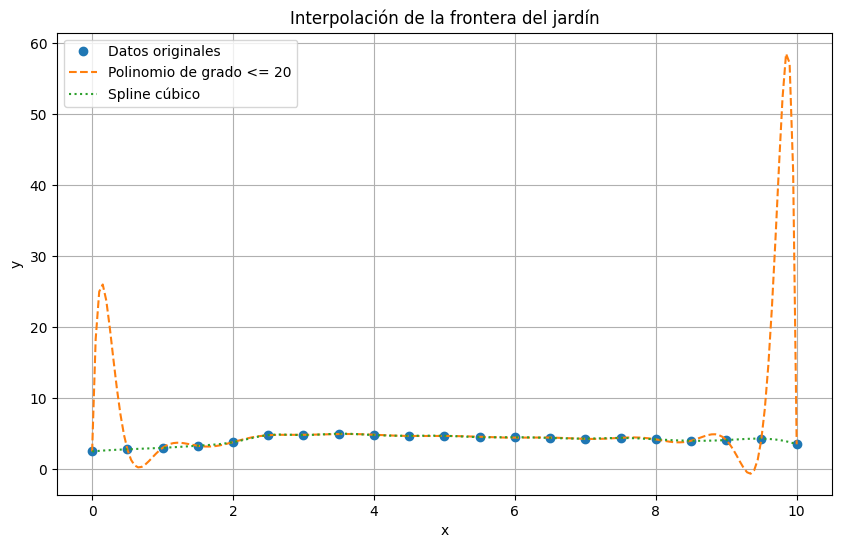

Área bajo el polinomio de grado <= 20: 61.4841 m²
Área bajo el spline cúbico: 41.7910 m²


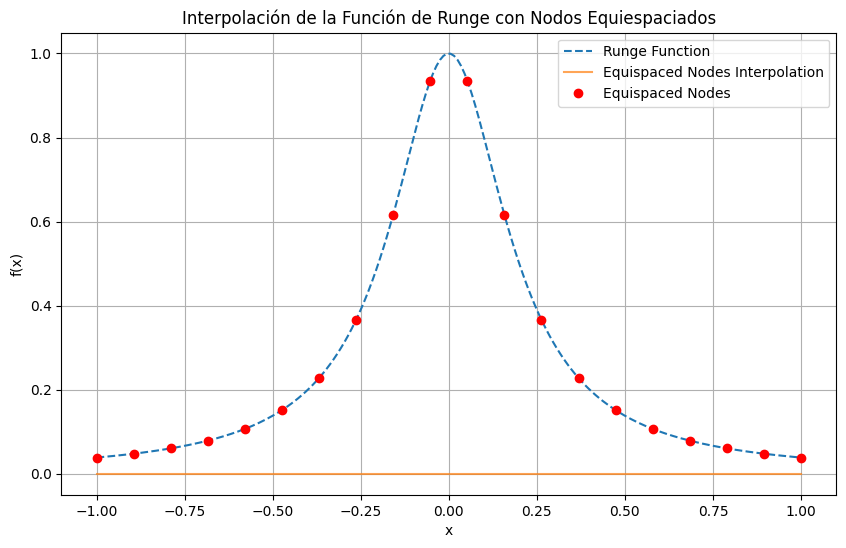

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import quad
from scipy.optimize import curve_fit

# Datos para el Problema 28
x = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
y = np.array([2.5, 2.8, 3, 3.3, 3.8, 4.8, 4.8, 5, 4.8, 4.7, 4.7, 4.5, 4.5, 4.4, 4.3, 4.4, 4.2, 4, 4.1, 4.3, 3.5])

# Ajuste de un polinomio de grado menor o igual a 20
coeffs = np.polyfit(x, y, 20)
poly_func = np.poly1d(coeffs)

# Interpolación con splines cúbicos
cs = CubicSpline(x, y)

# Crear rango de puntos para evaluar las funciones
x_vals = np.linspace(0, 10, 200)
y_poly = poly_func(x_vals)
y_spline = cs(x_vals)

# Graficar resultados de interpolación
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos originales')
plt.plot(x_vals, y_poly, label='Polinomio de grado <= 20', linestyle='--')
plt.plot(x_vals, y_spline, label='Spline cúbico', linestyle=':')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de la frontera del jardín')
plt.legend()
plt.grid(True)
plt.show()

# Calcular área bajo la curva utilizando métodos de integración
area_poly, _ = quad(poly_func, 0, 10)
area_spline, _ = quad(cs, 0, 10)

print(f"Área bajo el polinomio de grado <= 20: {area_poly:.4f} m²")
print(f"Área bajo el spline cúbico: {area_spline:.4f} m²")

import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y, x_interp):
    """
    Interpolación de Lagrange para aproximar f(x_interp) dados los nodos (x, y).

    Args:
        x (numpy array): Nodos x.
        y (numpy array): Valores correspondientes de la función en los nodos.
        x_interp (float or numpy array): Punto(s) de interpolación.

    Returns:
        float or numpy array: Valor interpolado en el punto x_interp.
    """
    n = len(x)
    interpolated_value = np.zeros_like(x_interp)  # Inicializar array de resultados

    for j in range(n):
        Lj = np.prod([(x_interp - x[m]) / (x[j] - x[m]) for m in range(n) if m != j])
        interpolated_value += y[j] * Lj

    return interpolated_value

def runge_function(x):
    """Función de Runge: f(x) = 1 / (1 + 25x^2)"""
    return 1 / (1 + 25 * x**2)

def equispaced_nodes(n):
    """Generar nodos equiespaciados en [-1, 1]"""
    return np.linspace(-1, 1, n)

# Parámetros
n = 20

# Generar nodos equiespaciados
x_equi = equispaced_nodes(n)

# Evaluar la función de Runge en los nodos equiespaciados
y_equi = runge_function(x_equi)

# Interpolación de Lagrange en puntos equiespaciados
x_interp = np.linspace(-1, 1, 200)
y_interp_equi = lagrange_interpolation(x_equi, y_equi, x_interp)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(x_interp, runge_function(x_interp), label='Runge Function', linestyle='--')
plt.plot(x_interp, y_interp_equi, label='Equispaced Nodes Interpolation', linestyle='-', alpha=0.7)
plt.plot(x_equi, y_equi, 'o', label='Equispaced Nodes', color='red')
plt.title('Interpolación de la Función de Runge con Nodos Equiespaciados')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
